Import the necessary packages


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import seaborn as sns

from datetime import datetime

Load the data in a DataFrame and show the first 5 rows to inspect the DataFrame.

In [8]:
file = "customer_booking.csv"
data = pd.read_csv(file, encoding="ISO-8859-1") # ISO-8859-1 because of the error
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


**Information about the dataframe**
  
  
This dataset contains information about airline bookings, including the number of passengers, sales channel, trip type, purchase lead time, length of stay, flight hour, flight day, route, booking origin, and various flags indicating if the customer wanted extra baggage, preferred seat, or in-flight meals. The dataset also includes the total flight duration and a flag indicating if the booking was completed. This information can be used for various analyses, such as predicting demand, identifying popular routes, and understanding customer preferences.

**Column Description**:
* num_passengers = number of passengers travelling
* sales_channel = sales channel booking was made on
* trip_type = trip Type (Round Trip, One Way, Circle Trip)
* purchase_lead = number of days between travel date and booking date
* length_of_stay = number of days spent at destination
* flight_hour = hour of flight departure
* flight_day = day of week of flight departure
* route = origin -> destination flight route
* booking_origin = country from where booking was made
* wants_extra_baggage = if the customer wanted extra baggage in the booking
* wants_preferred_seat = if the customer wanted a preferred seat in the booking
* wants_in_flight_meals = if the customer wanted in-flight meals in the booking
* flight_duration = total duration of flight (in hours)
* booking_complete = flag indicating if the customer completed the booking

Create a new dataframe from this one:
* only containing following columns:  
num_passengers, purchase_lead, length_of_stay, booking_origin, flight_duration and booking_complete
* with only the rows where the booking is completed (1)


In [40]:
# with iloc
df = data[data['booking_complete'] == 1]
df = df.iloc[:, [0, 3, 4, 8, 12, 13]]


# with loc
df_new = data.loc[data['booking_complete'] == 1, ['num_passengers', 'purchase_lead', 'length_of_stay', 'booking_origin', 'flight_duration', 'booking_complete']]
# You can do it with the names of the columns, but it would be messier
# Boolean indexing comes first, then you can localize the columns.
df

,num_passengers,purchase_lead,length_of_stay,booking_origin,flight_duration,booking_complete
82,1,15,31,Malaysia,8.83,1
86,1,156,19,Malaysia,8.83,1
94,1,181,87,Singapore,8.83,1
109,1,127,17,Malaysia,8.83,1
122,1,42,17,Malaysia,8.83,1
...,...,...,...,...,...,...
49972,1,33,6,Taiwan,4.67,1
49977,2,15,6,Malaysia,4.67,1
49980,4,242,6,Malaysia,5.00,1
49984,2,7,6,Australia,5.62,1


Group the average days between booking date and traveling date per country of the booking. Display the countries with the lowest average of days between booking and traveling first and the ones with the most days last.

In [50]:
# Grouping the average days between the booking & traveling date per country
avg_days = data.groupby('booking_origin')['purchase_lead'].mean()
avg_days

booking_origin
(not set)                80.035714
Afghanistan             191.000000
Algeria                  27.000000
Argentina                80.333333
Australia                78.579622
                           ...    
United Arab Emirates     55.928571
United Kingdom           78.624277
United States            69.554825
Vanuatu                  11.000000
Vietnam                  69.422680
Name: purchase_lead, Length: 104, dtype: float64

In [51]:
# Sorting the countries booking origins starting from the lowest to the highest.
lowest_avg = avg_days.sort_values()
lowest_avg

booking_origin
Tanzania        10.000000
Vanuatu         11.000000
Israel          12.000000
Kenya           12.666667
Belarus         15.000000
                  ...    
Nicaragua      168.000000
Cyprus         172.500000
Afghanistan    191.000000
Bhutan         269.000000
Malta          291.000000
Name: purchase_lead, Length: 104, dtype: float64

In [114]:
bookings_per_country = data.groupby('booking_origin').size()
bookings_per_country.sort_values()



booking_origin
Guatemala          1
Estonia            1
Seychelles         1
Ghana              1
Gibraltar          1
               ...  
China           3387
Japan           3885
South Korea     4559
Malaysia        7174
Australia      17872
Length: 104, dtype: int64

Make a histogram (bar plot) of the purchase leads per country. Do this for the 5 countries with the most bookings. Place the purchase leads on the x-axis and the number of bookings on the y-axis. Use appropriate labels and show a legend.

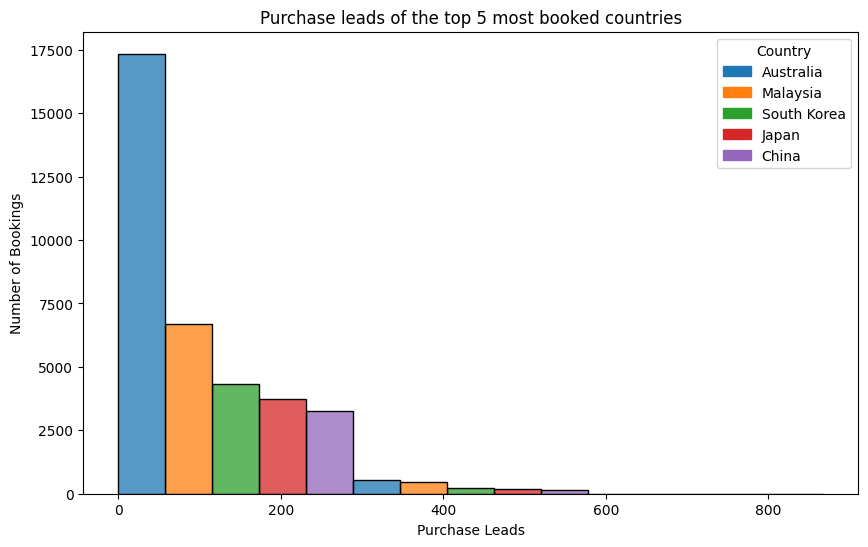

In [128]:
# First, group by 'booking_origin' and count the number of bookings per country
bookings_per_country = data.groupby('booking_origin').size()

# Then, sort the result and take the top 5 countries
top_countries = bookings_per_country.nlargest(5).index

# Now, filter the original DataFrame to only include rows from the top 5
filtered_data = data[data['booking_origin'].isin(top_countries)]

# Create a histogram filtering by the purchase leads
plt.figure(figsize=(10, 6))
bars = sns.histplot(data=filtered_data, x='purchase_lead', hue='booking_origin', hue_order=top_countries, multiple='dodge', binwidth=250)

plt.title('Purchase leads of the top 5 most booked countries')
plt.xlabel('Purchase Leads')
plt.ylabel('Number of Bookings')

# Get the current color palette
current_palette = sns.color_palette()

# Create handles using the current color palette
handles = [plt.Rectangle((0,0),1,1, color=current_palette[i]) for i in range(5)]
plt.legend(handles, top_countries, title='Country')
plt.show()